In [0]:
# SOM
# from https://www.superdatascience.com/deep-learning/ 


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

In [154]:
# Getting Data
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "perfil_politico.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

Credit_Card_Applications.csv  perfil_politico.csv


In [155]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+FILE_TO_DOWNLOAD)


dataset.head(  )




,Apoia privatizações das empresas brasileiras?,Lula deve ser solto,O impeachment de Dilma foi um golpe?,Legalização do aborto,Políticas de ações afirmativas (cotas),A favor da reforma agrária,Todos os brasileiro devem alcançar suas conquistas através da meritocracia,Apoia a legalização do porte de armas,Apoia a redução da maioridade penal,Apoia a laicidade do Estado,Apoia a diminuição do Estado,As Universidades são um gasto público?,A favor do foro privilegiado?,A favor de uma reforma política?,A favor de uma diminuição de regalias para os políticos?
0,1.0,0.0,0.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0,0.0,1,1
1,0.5,1.0,1.0,0.5,1.0,0.5,1.0,0.0,1.0,1.0,0.5,0,0.0,1,1
2,1.0,0.0,0.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0,0.0,0,1
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,1,1
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0.0,1,1


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 150)


X = dataset.iloc[:, :].values
esquerda = [0,1,1,0.5,1,1,0,0,0,0.5,0,0,0.5,0.5,0.5]
bolsominion = [1,0,0,0,0,0,1,1,1,1,1,0.5,1,1,0.5]
glauber = [0.5,0,0.5,0.5,0,1,0.5,0,0.5,0,0.5,0,0,1,1]
cicero = [0,1,1,1,1,1,0,0.5,1,1,0.5,0,0,1,1]

y = [esquerda, bolsominion, glauber, cicero ]



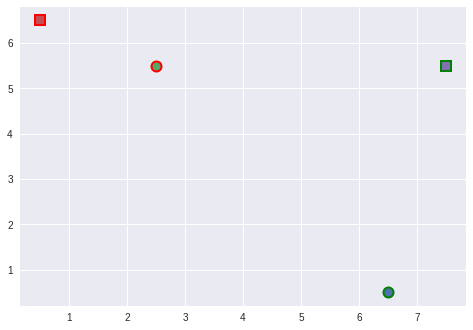

In [158]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

# # for i, x in enumerate(X):
#     w = som.winner(x)
#     plot(w[0] + 0.5,
#          w[1] + 0.5,
#          markers[y[i]],
#          markeredgecolor = colors[y[i]],
#          markerfacecolor = 'None',
#          markersize = 10,
#          markeredgewidth = 2)
# show()

w_dir = som.winner(bolsominion)
w_esq = som.winner(esquerda)
w_cic = som.winner(cicero)
w_glau = som.winner(glauber)
plot(w_dir[0] + 0.5, w_dir[1] +0.5, 'o', markeredgecolor='g', markersize = 10, markeredgewidth = 2)
plot(w_esq[0] + 0.5, w_esq[1] +0.5, 'o', markeredgecolor='r', markersize = 10, markeredgewidth = 2)
plot(w_cic[0] + 0.5, w_cic[1] +0.5, 's', markeredgecolor='r', markersize = 10, markeredgewidth = 2)
plot(w_glau[0] + 0.5, w_glau[1] +0.5, 's', markeredgecolor='g', markersize = 10, markeredgewidth = 2)

show()
